# Day 3 作業

## [作業目標]:
熟悉對 HSV 的操作、Histogram equalization,以及二值化的使用。

## [作業重點]:
1. 將 RGB 轉換為 HSV,分別印出 Hue, Saturation, Value
2. 對 Value 進行 Histogram Equalization,並印出處理結果(處理完的圖
片和處理完的 Value)
3. 將 RGB 轉換為 Gray level,再進行單值二值化及自適應二值化



## 解題步驟

1. 將 RGB 轉換為 HSV，分別印出 Hue, Saturation, Value
2. 對 Value 進行 Histogram Equalization，並印出處理結果(處理完的圖片和處理完的 Value)
3. 將 RGB 轉換為 Gray level，再進行單值二值化及自適應二值化

## 先讀取並顯示圖片

In [2]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import os

# 載入照片
img_dir = 'D:\DS_Suya\CV_Marathon\D3'
img_path = os.path.join(img_dir, 'lena.png')
# 以彩色照片載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

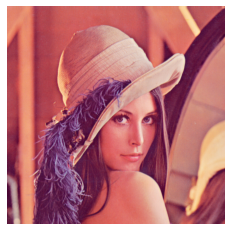

In [3]:
# cv2 預設 color space 是 BGR，但 matplotlib，
# 顯示是以 RGB 來顯示，故需要做順序的調整
plt.imshow(img[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

## 1. 將 RGB 轉換為 HSV，分別印出 Hue, Saturation, Value

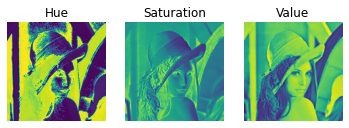

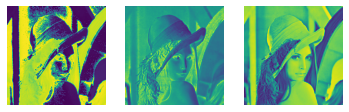

In [8]:
# 將 RGB 轉換為 HSV
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(img_hsv)
plt.figure()

plt.subplot(1, 3, 1, title='Hue')
plt.imshow(H)
plt.axis('off')

plt.subplot(1, 3, 2, title='Saturation')
plt.imshow(S)
plt.axis('off')

plt.subplot(1, 3, 3, title='Value')
plt.imshow(V)
plt.axis('off')

plt.show()

# 分別印出 Hue, Saturation, Value
title = ['Hue', 'Saturation', 'Value']
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(H)
ax1.axis('off')
ax2.imshow(S)
ax2.axis('off')
ax3.imshow(V)
ax3.axis('off')

plt.show()


## 2. 對 Value 進行 Histogram Equalization，並印出處理結果(處理完的圖片和處理完的 Value)

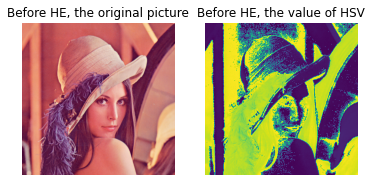

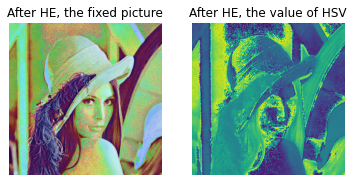

In [14]:
# 先印出 HE 前的圖片與 value
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Before HE, the original picture')
ax1.imshow(img[..., [2, 1, 0]])
ax1.axis('off')
ax2.set_title('Before HE, the value of HSV')
ax2.imshow(img_hsv[..., 0]) # 僅顯示value
ax2.axis('off')
plt.show()

# 印出 HE 後的圖片與 value
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """

img_hsv[..., 0] = cv2.equalizeHist(img_hsv[..., 0])
img_valueHE = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)
fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('After HE, the fixed picture')
ax1.imshow(img_valueHE[..., [2, 1, 0]])
ax1.axis('off')
ax2.set_title('After HE, the value of HSV')
ax2.imshow(img_hsv[..., 0]) # 僅顯示value
ax2.axis('off')
plt.show()

## 3. 將 RGB 轉換為 Gray level，再進行單值二值化及自適應二值化

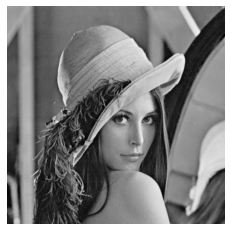

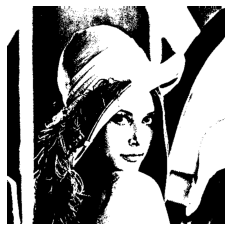

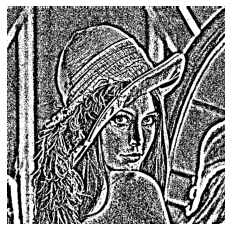

In [21]:
# 將圖片轉換為灰階圖片
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()
# Single Binarization
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
ret, img_bi = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(img_bi, cmap='gray')
plt.axis('off')
plt.show()
# Adaptive Binarization
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
img_adaptive_bi = cv2.adaptiveThreshold(img_gray, 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                       cv2.THRESH_BINARY, 
                                       21, 0)
plt.figure()
plt.imshow(img_adaptive_bi, cmap='gray')
plt.axis('off')
plt.show()